<h2><center>LUBRICATION OIL MODEL PREDICTION</h2>

<h3>1. Linear Regression</h3>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load pre-split reduced datasets
train_features = pd.read_csv('data/train_features_original.csv')
train_labels = pd.read_csv('data/train_labels.csv').values.ravel()  # Flattening labels
val_features = pd.read_csv('data/val_features_original.csv')
val_labels = pd.read_csv('data/val_labels.csv').values.ravel()      # Flattening labels
test_features = pd.read_csv('data/test_features_original.csv')
test_labels = pd.read_csv('data/test_labels.csv').values.ravel()    # Flattening labels

# Define the model and parameter grid
model = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

# Grid Search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_features, train_labels)

# Select the best model and make predictions
best_model = grid_search.best_estimator_
val_predictions = best_model.predict(val_features)
test_predictions = best_model.predict(test_features)

# Evaluate model performance
val_mse = mean_squared_error(val_labels, val_predictions)
val_r2 = r2_score(val_labels, val_predictions)
test_mse = mean_squared_error(test_labels, test_predictions)
test_r2 = r2_score(test_labels, test_predictions)

# Output results
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Validation Mean Squared Error: {val_mse:.4f}')
print(f'Validation R^2 Score: {val_r2:.4f}')
print(f'Test Mean Squared Error: {test_mse:.4f}')
print(f'Test R^2 Score: {test_r2:.4f}')


Best Parameters: {'fit_intercept': False}
Validation Mean Squared Error: 0.2066
Validation R^2 Score: 0.7939
Test Mean Squared Error: 0.2098
Test R^2 Score: 0.7896


<h4>1.1 Top Features (LR)</h4>

In [15]:
# Get feature names from the training data
feature_names = train_features.columns

# Create a DataFrame to store feature coefficients
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_model.coef_
})

# Sort the coefficients by absolute value to find the most influential features
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
top_features = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top features
# print("Top Features:")
#print(top_features.head(10))  # Show top 10 features


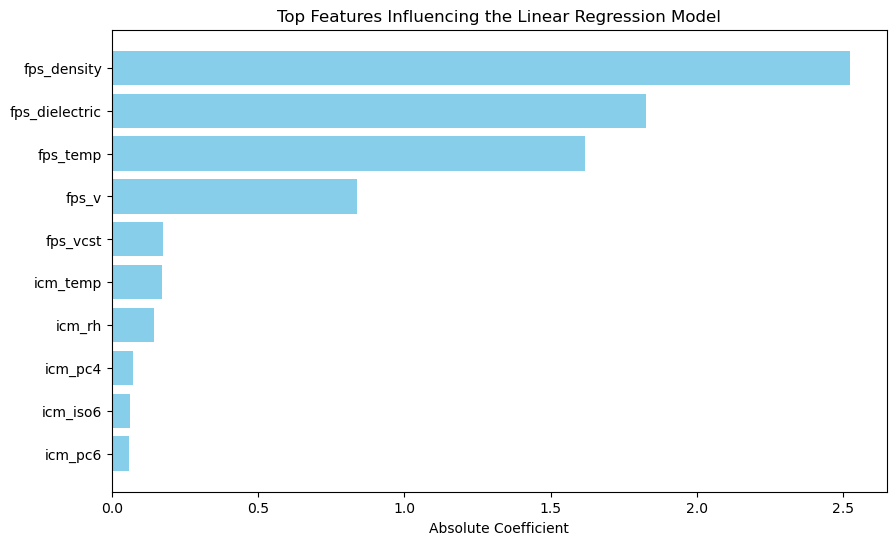

In [16]:
import matplotlib.pyplot as plt

# Plotting the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'].head(10), top_features['Absolute Coefficient'].head(10), color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.title('Top Features Influencing the Linear Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest values at the top
plt.show()


<h3>2. Random Forest Regression</h3>

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load pre-split datasets
train_features = pd.read_csv('data/train_features_original.csv')
train_labels = pd.read_csv('data/train_labels.csv')
val_features = pd.read_csv('data/val_features_original.csv')  
val_labels = pd.read_csv('data/val_labels.csv')
test_features = pd.read_csv('data/test_features_original.csv')
test_labels = pd.read_csv('data/test_labels.csv')

# Define the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(train_features, train_labels.values.ravel())

# Make predictions on the validation set for evaluation
val_predictions = model.predict(val_features)

# Evaluate model performance on the validation set
val_mse = mean_squared_error(val_labels, val_predictions)
val_r2 = r2_score(val_labels, val_predictions)

# Make final predictions on the test set
test_predictions = model.predict(test_features)

# Evaluate model performance on the test set
test_mse = mean_squared_error(test_labels, test_predictions)
test_r2 = r2_score(test_labels, test_predictions)

# Output results
print(f'Validation Mean Squared Error: {val_mse:.4f}')
print(f'Validation R^2 Score: {val_r2:.4f}')
print(f'Test Mean Squared Error: {test_mse:.4f}')
print(f'Test R^2 Score: {test_r2:.4f}')


Validation Mean Squared Error: 0.0169
Validation R^2 Score: 0.9831
Test Mean Squared Error: 0.0172
Test R^2 Score: 0.9827


<h4> Top Feature (RFR)</h4>

Best Feature: fps_dielectric, Importance: 0.7403


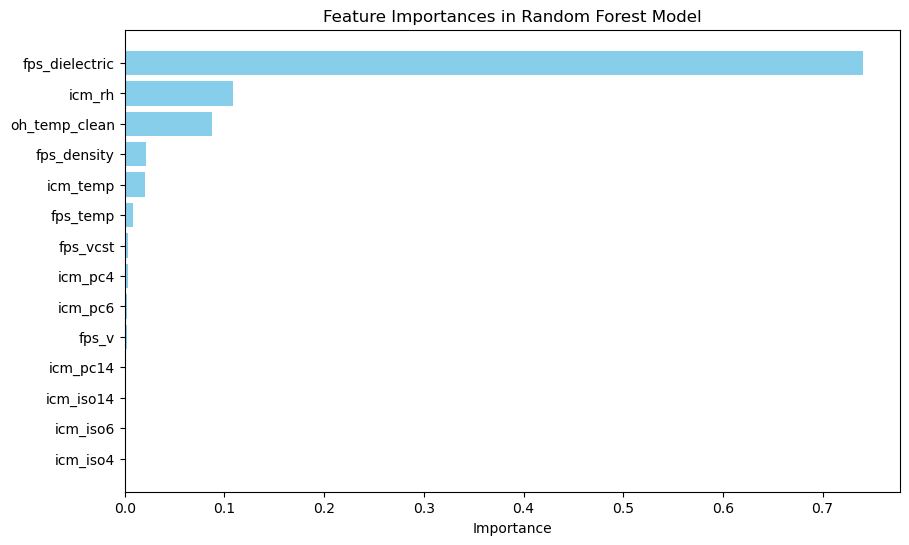

In [7]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': train_features.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Get the best feature
best_feature = feature_importances.iloc[0]
print(f'Best Feature: {best_feature["Feature"]}, Importance: {best_feature["Importance"]:.4f}')

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()